# Modul 7 Praktikum Sains Data: Pengantar TensorFlow & Keras

Kembali ke [Sains Data](./saindat2024genap.qmd)

Sekarang kita sudah masuk ke materi *artificial neural network* (ANN) atau biasa disebut *neural network* (NN), yang mendasari dunia *deep learning*.

Saat modul praktikum ini disusun (April 2024), ada dua *framework* utama untuk *deep learning* di Python, yaitu:

1. TensorFlow: <https://www.tensorflow.org/>

    (dan Keras di dalamnya: <https://keras.io/>)

2. PyTorch: <https://pytorch.org/>

Kedua *framework* ini bersaing. Umumnya, TensorFlow lebih sering digunakan di industri, sedangkan PyTorch lebih sering digunakan dalam riset/penelitian.

Di pertemuan kali ini, kita akan membahas TensorFlow, baik penggunaannya secara sendiri (*pure TensorFlow*, yaitu tanpa Keras) maupun dengan bantuan Keras. Kalau belum punya, instal terlebih dahulu:

In [ ]:
pip install tensorflow

Keras terinstal bersama TensorFlow (karena Keras ada di dalamnya).

Lalu import:

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Teori *Neural Network*

*Overview:*

- Secara umum, suatu *neural network* terdiri dari sejumlah *layer* atau lapisan (minimal dua).

- *Layer* pertama disebut *input layer*, dan *layer* terakhir disebut *output layer*.

- Tiap *layer* terdiri dari sejumlah *neuron*, yang masing-masing bisa menyimpan suatu nilai.

- Kecuali *input layer*, tiap *neuron* terhubung dengan sejumlah *neuron* di *layer* sebelumnya.

- Tiap sambungan terdiri dari nilai *weight* (sebagai pengali), nilai *bias* (sebagai pergeseran), dan suatu "fungsi aktivasi" yang menghasilkan nilai untuk *neuron* tujuan.

- *Weight* maupun *bias* disebut **parameter** dari *neural network*.

- Proses *training* adalah terus-menerus memperbarui parameter hingga hasil prediksi *neural network* sudah cukup baik, dengan meminimumkan suatu ***loss function*** atau fungsi objektif (yang intinya menghitung *error*).

- Suatu *neural network* bisa memiliki sejumlah *layer*, masing-masing dengan banyaknya *neuron* tertentu dan fungsi-fungsi aktivasi tertentu. Hal-hal itu disebut 
***hyperparameter*** dari *neural network*. Suatu **arsitektur** adalah suatu pilihan/konfigurasi *hyperparameter*.

### SLP: *(Single-Layer) Perceptron*

ANN paling pertama adalah *perceptron* (juga disebut SLP atau *single-layer perceptron*) yang dirancang oleh Frank Rosenblatt pada tahun 1957 (Géron, 2019). Ini adalah *neural network* yang paling sederhana, bahkan ini bisa disebut *building block* dari semua ANN (apabila diberi kebebasan untuk modifikasi). Konsep dasar *neural network* bisa kita pelajari di sini.

![](./gambar/aggarwal_nndl_hal5.png)

Sumber gambar: Aggarwal (2018) hal. 5

*Perceptron* hanya terdiri dari satu *input layer* dan satu *output layer*. Bahkan, aslinya hanya ada satu *neuron* di *output layer*.

Apabila dibutuhkan lebih dari satu *neuron* di *output layer*, itu bisa dianggap menggunakan lebih dari satu *perceptron* (yaitu menggunakan banyaknya *perceptron* sesuai banyaknya *neuron* di *output layer*), yang saling "ditumpuk":

![](./gambar/goodfellow_dl_hal337_crop.png)

Sumber gambar: Goodfellow, et. al. (2016) hal. 337

Perhatikan bahwa, tiap *neuron* di *layer* asal terhubung dengan tiap *neuron* di *layer* tujuan. *Layer* tujuan seperti ini disebut ***dense*** (padat). Kebalikan dari *dense* adalah *sparse*.

Aslinya, fungsi aktivasi yang digunakan oleh *perceptron* adalah *Heaviside step function* $H(v)$ yang mungkin kalian kenal dari mata kuliah PDB, atau juga disebut *threshold activation function*:

$$H(v) = \begin{cases}
    1, & v \ge 0 \\
    0, & v < 0
\end{cases}$$

Sehingga, untuk *output neuron* ke-$j$ yang disambung dari $n$ *input neuron*, model *perceptron* bisa dirumuskan sebagai berikut:

$$y_j = H\left(\left(\sum_{i=1}^{n} w_{ij} x_i \right) + b_j\right)$$

dengan

- $x_i$ adalah nilai pada *input neuron* ke-$i$

- $y_j$ adalah nilai pada *output neuron* ke-$j$

- $w_{ij}$ adalah parameter *weight* untuk sambungan *input neuron* ke-$i$ menuju *output neuron* ke-$j$

- $b_j$ adalah parameter *bias* untuk *output neuron* ke-$j$

Lebih umumnya,

$$y_j = \Phi\left(\left(\sum_{i=1}^{n} w_{ij} x_i \right) + b_j\right)$$

dengan $\Phi(v)$ adalah sembarang fungsi aktivasi.

*Note:* seperti di gambar, sebenarnya *bias* juga bisa dianggap *neuron* istimewa yang nilai $x_i$ nya selalu satu.

Biasanya, semua nilai di *layer* selanjutnya dihitung secara sekaligus menggunakan perkalian matriks, dengan perumusan:

$$\textbf{y} = \Phi\left(W^T \textbf{x} + \textbf{b}\right)$$

dengan $\textbf{x} = [x_i]$, $\textbf{y} = [y_j]$, dan $\textbf{b} = [b_j]$ adalah vektor **kolom**, serta $W = \left[w_{ij}\right]$ adalah matriks.

Itu untuk satu buah data *training*.

Bisa saja, beberapa data *training* diperhitungkan sekaligus. Caranya, vektor kolom $\textbf{x}$ itu kita "lebarkan" ke samping sehingga menjadi matriks $X = [x_{it}]$, sehingga data *training* ke-$t$ ada di kolom ke-$t$. Dengan demikian, *output* nya akan berupa matriks $Y = [y_{jt}]$ dengan hasil untuk data *training* ke-$t$ ada di kolom ke-$t$. Selain itu, vektor $\textbf{b}$ perlu diperluas menjadi matriks $B$ dengan tiap kolom identik, dan fungsi aktivasi $\Phi$ dihitung per kolom.

$$Y = \Phi\left(W^T X + B\right)$$

Kembali ke kasus satu buah data *training*. Biasanya, dataset disajikan dengan tiap fitur di kolom sendiri, tidak seperti perumusan kita sejauh ini dengan tiap fitur di baris tersendiri. Untuk menyesuaikan, kita bisa men-*transpose* semuanya:

$$\textbf{y} = \Phi\left(\textbf{x} W + \textbf{b}\right)$$

dengan $\textbf{x} = [x_i]$, $\textbf{y} = [y_j]$, dan $\textbf{b} = [b_j]$ adalah vektor **baris**, serta $W = \left[w_{ji}\right]$ adalah matriks berisi bobot untuk menyambung ke *output neuron* ke-$j$ dari *input neuron* ke-$i$.

### MLP: *Multilayer Perceptron*

Konsep *single-layer perceptron* bisa diperumum menjadi *multilayer perceptron* atau *neural network* yang biasa kita kenal, dengan menambahkan beberapa *layer* di antara *input layer* dan *output layer*. Semua *layer* selain *input layer* dan *output layer* disebut *hidden layer*.

![](./gambar/aggarwal_nndl_hal18.png)

Sumber gambar: Aggarwal (2018) hal. 18

Konsep perhitungan antara tiap *layer* tetap sama, yaitu

$$\textbf{y} = \Phi\left(\textbf{w}^T \textbf{x} + \textbf{b}\right)$$

(versi vektor kolom), atau

$$\textbf{y} = \Phi\left(\textbf{x} W + \textbf{b}\right)$$

(versi vektor baris)

### Fungsi Aktivasi

![](./gambar/aggarwal_nndl_hal13.png)

Sumber gambar: Aggarwal (2018) hal. 13

Beberapa fungsi aktivasi adalah (Aggarwal, 2018, hal. 12-13):

a. "Linier" atau identitas

$$\Phi(v) = v$$

b. *Sign* (fungsi tanda): $\text{sign}(v)$ atau $\text{sgn}(v)$

$$
\Phi(v) = \text{sign}(v) = \begin{cases}
    1, & v > 0 \\
    0, & v = 0 \\
    -1, & v < 0
\end{cases}
$$

c. Sigmoid, terkadang dilambangkan $\sigma(v)$ dan terkadang disebut fungsi aktivasi logistik

$$\Phi(v) = \frac{1}{1 + e^{-v}}$$

d. *(Soft)* tanh: $\tanh(v)$

$$\Phi(v) = \frac{e^{2v} - 1}{e^{2v} + 1} = 2 * \text{sigmoid}(2v) - 1$$

e. *Rectified Linear Unit* (ReLU)

$$\Phi(v) = \max\{v, 0\}$$

f. *Hard tanh*

$$\Phi(v) = \max\{\min\{v, 1\}, -1\}$$

Fungsi aktivasi yang paling sering digunakan adalah ReLU, kecuali untuk *output layer*.

Untuk *output layer*, biasanya,

- untuk regresi, banyaknya *neuron* sesuai banyaknya nilai prediksi (umumnya hanya satu), dan digunakan fungsi aktivasi linier

- untuk klasifikasi *multiclass* (lebih dari dua kelas), biasanya banyaknya *output neuron* sesuai banyaknya kelas, dan digunakan fungsi aktivasi ***softmax*** sebagai berikut, agar *output* berupa peluang tiap kelas:

$$\Phi(\overline{v})_i = \frac{\exp(v_i)}{\sum_{j=1}^k \exp(v_j)}$$

- untuk klasifikasi biner, hanya ada satu *neuron* di *output layer*, dan digunakan fungsi aktivasi *sigmoid*. (Keberadaan hanya satu *output neuron* lebih hemat daripada menggunakan dua *output neuron*)

### *Loss function*

Misalkan $y_i$ adalah nilai sebenarnya dan $\hat{y}_i$ adalah hasil prediksi.

Untuk regresi, biasa digunakan MSE *(mean squared error)*, juga disebut *L2 loss*:

$$\text{MSE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2$$

Untuk klasifikasi, biasa digunakan yang namanya *cross-entropy loss*, juga disebut *logistic loss* atau *log loss*:

$$L_{\text{log}}(y,\hat{y}) = -(y \ln (\hat{y}) + (1 - y) \ln (1 - \hat{y}))$$

### Proses *training*

Proses *training* untuk *neural network* dilakukan secara iteratif, yaitu tiap iterasi akan memperbarui parameter sehingga nilai *loss function* menjadi lebih kecil.

Tiap iterasi melakukan langkah-langkah berikut untuk tiap data *training*:

1. *Forward pass*: menghitung nilai *output* akhir, yaitu $\hat{y}$ (hasil prediksi), berdasarkan *input* data *training*.

2. Menghitung *loss* antara $y$ (nilai asli) dan $\hat{y}$

3. *Backpropagation*: menghitung gradien dari *loss* terhadap tiap parameter, secara "mundur"

4. *Update optimizer*: menggunakan algoritma *optimizer* seperti *gradient descent* untuk memperbarui parameter-parameter (*weights and biases*) berdasarkan gradien dari *loss*

    Note: ada banyak *optimizer*, seperti *gradient descent*, SGD (*stochastic gradient descent*), dan *Adam* (*adaptive moment estimation*). Pilihan *optimizer* (serta parameter-parameter yang bisa diatur untuk *optimizer*, seperti *learning rate*) juga menjadi *hyperparameter* untuk *neural network*.

Note: istilah *backward pass* meliputi langkah *backpropagation* dan *update optimizer*.

Apabila data *training* sangat banyak, terkadang data *training* tersebut dibagi menjadi beberapa *batch*, dan tiap iterasi menggunakan *batch* yang berbeda. Apabila semua *batch* sudah diproses, sebutannya adalah satu ***epoch***. Sehingga, satu *epoch* terdiri dari sejumlah iterasi sesuai banyaknya *batch*.

(Apabila data *training* tidak dibagi menjadi *batch*, maka satu *epoch* sama dengan satu iterasi.)

### Contoh *optimizer*: metode *gradient descent*

Metode *gradient descent* mencari minimum lokal dari suatu fungsi $g$ (dalam hal ini, *loss function*) dengan rumus iterasi seperti berikut:

$$\textbf{x}_{i+1} = \textbf{x}_i - \eta \nabla g\left(\textbf{x}_i\right)$$

dengan $\eta$ adalah *learning rate*. Simbol nabla ($\nabla$) menandakan perhitungan gradien.

Perhatikan bahwa gradien menandakan arah tercepat untuk kenaikan fungsi, seringkali disebut *direction of steepest ascent*. Di sini, justru kita mengurangi; atau sama saja, menambah dengan kebalikannya, yaitu arah tercepat untuk penurunan fungsi. Sedangkan, *learning rate* melambangkan seberapa jauh kita melangkah ke arah penurunan tersebut. Harapannya, kita akan cepat konvergen menuju minimum fungsi, karena kita terus melangkah ke arah penurunan tercepat.

Variasi *gradient descent* adalah SGD *(stochastic gradient descent)*. Bedanya sederhana saja:

- *Gradient descent* selalu memanfaatkan keseluruhan data *training* yang diberikan (lebih tepatnya, keseluruhan *batch*) di tiap iterasi.

- Sedangkan, SGD selalu memilih sebagian data *training* saja (lebih tepatnya, sebagian dari *batch*), dan cara memilihnya bersifat *random* atau disebut stokastik.

Keuntungan SGD dibandingkan *gradient descent* biasa:

- Waktu *training* menjadi lebih cepat

- Tidak rawan terjebak di minimum lokal: <https://www.youtube.com/watch?v=UmathvAKj80&t=102>

### *Train-Validation-Test Split*

Ketika menggunakan metode *machine learning* yang di-*training* secara iteratif, seperti *neural network*, biasanya ada juga yang namanya *validation data*. Sehingga, di awal, *dataset* dipisah menjadi data *train*, data *validation*, dan data *test*.

Gunanya, kita bisa menguji akurasi model di akhir tiap *epoch*, menggunakan data *validation* daripada data *test*.

Rasio yang paling sering digunakan adalah 80-10-10, yaitu 80% data *train*, 10% data *validation*, dan 10% data *test*.

Apabila menggunakan scikit-learn, untuk melakukan *train-validation-test split*, caranya adalah dengan *split* dua kali, yaitu

1. *Split* menjadi data "train" dan data *test*

2. Data "train" itu di-*split* lagi menjadi data *train* sesungguhnya dan data *validation*

atau bisa juga

1. *Split* menjadi data *train* dan data "test"

2. Data "test" itu di-*split* lagi menjadi data *validation* dan data *test* sesungguhnya

## Mengenal TensorFlow

In [ ]:
import tensorflow as tf

### *Tensor*, Konstanta

*Tensor* adalah semacam perumuman dari *array*/vektor ataupun *matriks*.

- Skalar (bilangan) adalah *tensor* berdimensi nol (atau *rank* nol).

- *Array* atau vektor adalah *tensor* berdimensi satu (atau *rank* satu).

- Matriks adalah *tensor* berdimensi dua (atau *rank* dua).

- Istilah *"tensor"* biasanya merujuk pada *tensor* berdimensi tiga (atau *rank* tiga), yaitu semacam matriks tapi tiga dimensi, sehingga ada baris, kolom, dan satu dimensi lagi.

Fitur *tensor* di TensorFlow mirip dengan fitur *array* di numpy, yang memang juga bisa multidimensi.

In [10]:
x = tf.zeros(shape = (3,4))
print(x)

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)


In [9]:
x = tf.ones(shape = (3,4))
print(x)

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


Untuk menentukan *array* kita sendiri, di numpy digunakan `numpy.array`.

Untuk menentukan *tensor* kita sendiri, di TensorFlow digunakan `tensorflow.constant` (agar nilainya tidak bisa diubah) atau `tensorflow.Variable` (nilainya bisa diubah).

Pada umumnya (apabila tidak ada keterangan), *tensor* di TensorFlow berupa `tensorflow.constant`

In [25]:
const0 = tf.constant(1.5)
print(const0)

tf.Tensor(1.5, shape=(), dtype=float32)


In [26]:
print(tf.rank(const0))

tf.Tensor(0, shape=(), dtype=int32)


In [27]:
const1 = tf.constant([2.31, 4.567, 8.9])
print(const1)

tf.Tensor([2.31  4.567 8.9  ], shape=(3,), dtype=float32)


In [28]:
print(tf.rank(const1))

tf.Tensor(1, shape=(), dtype=int32)


In [31]:
const1[0] = 52.5

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [29]:
const2 = tf.constant([
    [1, 2.718, 3.14],
    [4, 5, 6.28]
])
print(const2)

tf.Tensor(
[[1.    2.718 3.14 ]
 [4.    5.    6.28 ]], shape=(2, 3), dtype=float32)


In [30]:
print(tf.rank(const2))

tf.Tensor(2, shape=(), dtype=int32)


### Variabel dan *assignment* untuk tensor

In [3]:
v = tf.Variable(initial_value = tf.zeros(shape = (2,3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>


*Assignment* untuk variabel di TensorFlow dilakukan dengan `.assign`

In [4]:
v.assign(tf.ones(shape = (2,3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


In [5]:
v[0, 0].assign(9)
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[9., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


Ada juga `.assign_add`, sama saja dengan `+=`

In [6]:
v.assign_add(tf.ones(shape = (2,3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[10.,  2.,  2.],
       [ 2.,  2.,  2.]], dtype=float32)>


Serupa, ada `.assign_sub` yaitu `-=`

In [7]:
v.assign_sub(tf.ones(shape = (2,3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[9., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


### Tensor random

Kita bisa membuat *tensor* dengan nilai yang *random*, misalnya dari distribusi normal atau dari distribusi uniform

In [76]:
# dari distribusi normal
x = tf.random.normal(shape = (2,3), mean = 0, stddev = 1)
print(x)

tf.Tensor(
[[ 1.2542483  -0.41693744  1.0116149 ]
 [-1.4155766   0.17204648 -0.6892854 ]], shape=(2, 3), dtype=float32)


In [77]:
# dari distribusi uniform
x = tf.random.uniform(shape = (2,3), minval = 0, maxval = 1)
print(x)

tf.Tensor(
[[0.51321495 0.26164746 0.09113109]
 [0.81229377 0.67134035 0.36057925]], shape=(2, 3), dtype=float32)


### Operasi TensorFlow seperti numpy

Operasi di TensorFlow mirip dengan numpy

In [56]:
a = 4 * tf.ones((2, 2))
print(a)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [57]:
b = tf.square(a)
print(b)

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)


In [58]:
c = tf.sqrt(a)
print(c)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [59]:
d = b + c
print(d)

tf.Tensor(
[[18. 18.]
 [18. 18.]], shape=(2, 2), dtype=float32)


In [60]:
# perkalian matriks
e = tf.matmul(a, c)
print(e)

tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)


In [61]:
# perkalian per elemen
e *= d
print(e)

tf.Tensor(
[[288. 288.]
 [288. 288.]], shape=(2, 2), dtype=float32)


### *Automatic differentiation* dengan `GradientTape`

TensorFlow memiliki fitur yang bernama *automatic differentiation*, juga disebut *autodiff* atau *autograd*. Dengan fitur ini, TensorFlow bisa menghitung turunan/gradien secara otomatis. Fitur ini membedakan antara TensorFlow dengan numpy.

Caranya adalah menggunakan `GradientTape` seperti berikut. Semua operasi di dalam *with statement* dicatat oleh `GradientTape`, yang kemudian bisa menghitung gradiennya.

Contohnya, turunan $x^3$ terhadap $x$ di $x=4$ adalah $3(4)^2 = 48$.

In [72]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape:
    y = x ** 3
dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(48.0, shape=(), dtype=float32)


Tidak harus dengan `tensorflow.Variable`, bahkan dengan `tensorflow.constant` juga bisa. Namun, kita harus secara eksplisit meminta TensorFlow untuk memperhatikan nilai `x`, yaitu dengan `.watch`

In [73]:
x = tf.constant(4.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x ** 3
dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(48.0, shape=(), dtype=float32)


Kita bisa menghitung turunan kedua dengan *nested with statement* seperti berikut, contohnya turunan kedua dari $x^3$ terhadap $x$ di $x=4$ adalah $6(4) = 24$

In [74]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape1:
        y = x ** 3
    dy_dx = tape1.gradient(y, x)
dy2_dx2 = tape2.gradient(dy_dx, x)
print(dy2_dx2)

tf.Tensor(24.0, shape=(), dtype=float32)


## *(Pure)* TensorFlow: klasifikasi biner dengan *perceptron*

*Perceptron* digunakan untuk klasifikasi biner. Mari kita coba buat model *perceptron* dengan *pure* TensorFlow, menggunakannya untuk memprediksi kelas dari titik-titik dua dimensi.

### *Generate* dataset

Dataset titik-titik dua dimensi, dengan dua kelas (misalnya "negatif" dan "positif"), bisa kita *generate*:

In [27]:
num_samples_per_class, num_classes = 1000, 2
negative_samples = np.random.multivariate_normal(mean = [0,3], cov = [[1,0.5],[0.5,1]], size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3,0], cov = [[1,0.5],[0.5,1]], size = num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype = 'float32'),
    np.ones((num_samples_per_class, 1), dtype = 'float32')
))

In [35]:
print(inputs.shape)
print(targets.shape)

(2000, 2)
(2000, 1)


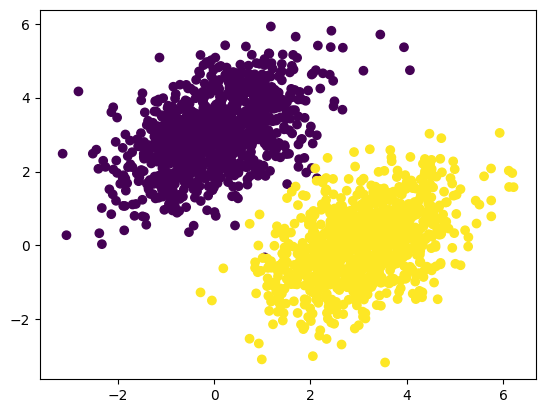

In [28]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Kalau mau, kita bisa susun data ini ke dalam bentuk pandas DataFrame, lalu export ke CSV:

In [29]:
titik_negatif_positif_df = pd.DataFrame(
    np.hstack([inputs, targets]),
    columns = ["x", "y", "kelas"]
)

In [30]:
titik_negatif_positif_df

,x,y,kelas
0,1.173375,4.570637,0.0
1,0.195961,3.504604,0.0
2,0.121400,2.163783,0.0
3,-1.170182,3.882771,0.0
4,-0.424403,0.534641,0.0
...,...,...,...
1995,2.423160,-0.337196,1.0
1996,1.949836,-0.627813,1.0
1997,2.109928,-0.382492,1.0
1998,4.178664,0.486168,1.0


In [31]:
titik_negatif_positif_df.to_csv("./titik_negatif_positif.csv", index=False)

### *Import* kembali dataset

Tentunya, karena titik-titiknya di-*generate* secara *random*, mungkin saja titik-titik yang kalian peroleh akan sedikit berbeda, bahkan tiap kali di-*run* ulang akan berbeda.

Kalau kalian mau menyamakan dengan modul ini, CSV nya bisa di-*download* dari GitHub Pages ini: [titik_negatif_positif.csv](./titik_negatif_positif.csv)

Kita bisa import kembali:

In [5]:
df = pd.read_csv("./titik_negatif_positif.csv", dtype="float32")

Kali ini, kita tambahkan keterangan `dtype="float32"`. Ini penting, karena TensorFlow biasanya menangani `float32` (yaitu tipe data `float` dengan penyimpanan 32-bit), bukan `float64` yang biasa digunakan oleh pandas.

In [6]:
df

,x,y,kelas
0,1.173375,4.570637,0.0
1,0.195961,3.504604,0.0
2,0.121400,2.163783,0.0
3,-1.170182,3.882771,0.0
4,-0.424403,0.534641,0.0
...,...,...,...
1995,2.423160,-0.337196,1.0
1996,1.949836,-0.627813,1.0
1997,2.109928,-0.382492,1.0
1998,4.178664,0.486168,1.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float32
 1   y       2000 non-null   float32
 2   kelas   2000 non-null   float32
dtypes: float32(3)
memory usage: 23.6 KB


In [7]:
inputs_df = df.drop(columns=["kelas"])
targets_df = df[["kelas"]]

In [8]:
inputs_df

,x,y
0,1.173375,4.570637
1,0.195961,3.504604
2,0.121400,2.163783
3,-1.170182,3.882771
4,-0.424403,0.534641
...,...,...
1995,2.423160,-0.337196
1996,1.949836,-0.627813
1997,2.109928,-0.382492
1998,4.178664,0.486168


In [9]:
targets_df

,kelas
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1995,1.0
1996,1.0
1997,1.0
1998,1.0


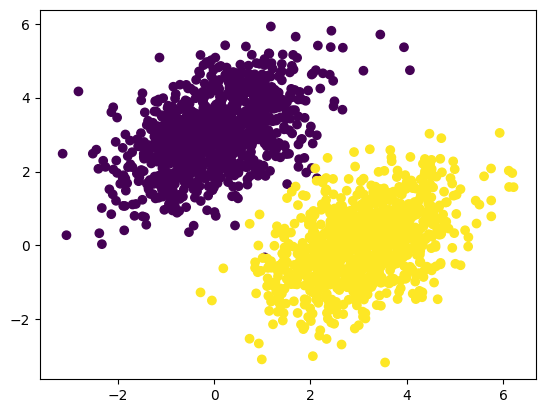

In [57]:
plt.scatter(inputs_df["x"], inputs_df["y"], c=targets["kelas"])
plt.show()

TensorFlow kurang bisa menangani pandas DataFrame, sehingga harus kita ubah jadi array numpy:

In [16]:
inputs = inputs_df.to_numpy()
targets = targets_df.to_numpy()

In [84]:
print(inputs.shape)
print(targets.shape)

(2000, 2)
(2000, 1)


### Menyusun model dan *training*

Untuk *input* dua dimensi dan klasifikasi biner, kita perlu *perceptron* dengan dua *neuron* di *input layer* dan satu *neuron* di *output layer*. Sebelum proses *training* dimulai, nilai matriks $W$ dan vektor kolom $b$ diisi secara *random* terlebih dahulu.

In [21]:
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.normal(shape = (input_dim, output_dim)))
b = tf.Variable(tf.random.normal(shape = (output_dim,)))

In [12]:
# forward pass
def model(inputs):
    return tf.sigmoid(
        tf.matmul(inputs, W) + b
    )

In [13]:
# cross entropy loss
def entropy_loss(y, yhat):
    per_sample_losses = - y * tf.math.log(yhat) - (1-y) * tf.math.log(1-yhat)
    return tf.reduce_mean(per_sample_losses)

In [14]:
# satu epoch di training loop
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = entropy_loss(targets, predictions)

        grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])

        # update menggunakan gradient descent
        W.assign_sub(learning_rate * grad_loss_wrt_W)
        b.assign_sub(learning_rate * grad_loss_wrt_b)
        
        return loss

In [22]:
# training loop
for epoch in range(100):
    loss = training_step(inputs, targets)
    print(f"Loss at epoch {epoch}: {loss}")

Loss at epoch 0: 3.254241466522217
Loss at epoch 1: 2.841676712036133
Loss at epoch 2: 2.446164608001709
Loss at epoch 3: 2.0740654468536377
Loss at epoch 4: 1.7329306602478027
Loss at epoch 5: 1.4304780960083008
Loss at epoch 6: 1.1727027893066406
Loss at epoch 7: 0.9617642760276794
Loss at epoch 8: 0.7950283288955688
Loss at epoch 9: 0.6661190390586853
Loss at epoch 10: 0.5672049522399902
Loss at epoch 11: 0.4909631013870239
Loss at epoch 12: 0.43148183822631836
Loss at epoch 13: 0.38434457778930664
Loss at epoch 14: 0.34636563062667847
Loss at epoch 15: 0.31527045369148254
Loss at epoch 16: 0.2894296944141388
Loss at epoch 17: 0.26766350865364075
Loss at epoch 18: 0.24910621345043182
Loss at epoch 19: 0.23311251401901245
Loss at epoch 20: 0.21919457614421844
Loss at epoch 21: 0.2069779932498932
Loss at epoch 22: 0.19617150723934174
Loss at epoch 23: 0.18654564023017883
Loss at epoch 24: 0.1779175102710724


Loss at epoch 25: 0.17013971507549286
Loss at epoch 26: 0.16309219598770142
Loss at epoch 27: 0.1566763073205948
Loss at epoch 28: 0.15081030130386353
Loss at epoch 29: 0.14542590081691742
Loss at epoch 30: 0.1404656320810318
Loss at epoch 31: 0.13588076829910278
Loss at epoch 32: 0.13162976503372192
Loss at epoch 33: 0.12767699360847473
Loss at epoch 34: 0.12399168312549591
Loss at epoch 35: 0.12054720520973206
Loss at epoch 36: 0.11732034385204315
Loss at epoch 37: 0.11429077386856079
Loss at epoch 38: 0.11144062876701355
Loss at epoch 39: 0.10875413566827774
Loss at epoch 40: 0.10621732473373413
Loss at epoch 41: 0.10381780564785004
Loss at epoch 42: 0.10154449194669724
Loss at epoch 43: 0.0993875041604042
Loss at epoch 44: 0.09733790904283524
Loss at epoch 45: 0.09538772702217102
Loss at epoch 46: 0.09352975338697433
Loss at epoch 47: 0.09175743162631989
Loss at epoch 48: 0.09006485342979431
Loss at epoch 49: 0.08844659477472305
Loss at epoch 50: 0.08689778298139572
Loss at epoch 5

### Prediksi

Sekarang *training* sudah selesai, kita bisa gunakan model kita untuk memprediksi kelas berdasarkan `inputs` (koordinat titik-titik)

In [23]:
predictions = model(inputs)

Akibat penggunaan fungsi aktivasi sigmoid, hasil prediksi cukup jelas, apakah kelas pertama (kelas 0) atau kelas kedua (kelas 1):

In [24]:
print(predictions)

tf.Tensor(
[[0.0185734 ]
 [0.01658478]
 [0.06427375]
 ...
 [0.94514835]
 [0.99050665]
 [0.7908128 ]], shape=(2000, 1), dtype=float32)


Kita bisa menampilkan hasil prediksi ini dengan aturan pemilihan warna (`c`) seperti berikut:

- apabila nilai prediksinya lebih dari 0.5 (pernyataan "lebih besar dari 0.5" bernilai benar), ia tergolong kelas 1 (atau sama saja nilai True);

- selain itu (pernyataan "lebih besar dari 0.5" bernilai salah), ia tergolong kelas 0 (atau sama saja nilai False).

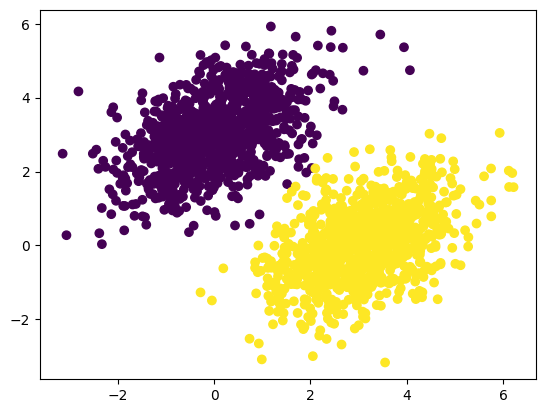

In [25]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Kinerja *perceptron* cukup mirip regresi logistik, ataupun SVM dengan kernel linier. Perhatikan bahwa, di hasil prediksi ini, seolah-olah ada perbatasan atau garis pemisah antara kedua kelas. Kalau kita bandingkan dengan data aslinya, sebenarnya ada beberapa titik yang melewati perbatasan tersebut, dan akhirnya terjadi misklasifikasi.

## Mengenal Keras dengan Sequential API

Dengan *pure* TensorFlow, banyak hal yang harus kita susun secara manual. Untuk *neural network* kecil seperti *perceptron*, mungkin tidak masalah. Namun, *neural network* pada umumnya sangat "dalam" atau *deep*, dengan puluhan *hidden layer* yang bervariasi.

Daripada benar-benar membuatnya semua secara manual, ada yang namanya Keras yang sangat menyederhanakan proses penyusunan *neural network*. Biasanya, daripada benar-benar membuat *neural network* secara manual dalam *pure* TensorFlow seperti tadi, pengguna TensorFlow memanfaatkan Keras.

Keras tersedia di dalam TensorFlow:

In [ ]:
from tensorflow import keras

Perlu dicatat, ketika menggunakan Keras, sebaiknya semua fungsi/operasi yang kita gunakan juga dari dalam Keras daripada langsung dari TensorFlow. Misalnya, daripada `tf.matmul`, gunakan `keras.ops.matmul`

Tapi kalau *error*, tidak masalah masih menggunakan `tf` karena Keras masih dalam pengembangan (menuju Keras versi 3, bisa dibaca di sini: <https://keras.io/guides/migrating_to_keras_3/>). Mungkin, di versi yang akan datang, sudah tidak *error* lagi.

Dalam Keras, ada tiga "cara" atau API *(application programming interface)* yang bisa kita gunakan untuk menyusun *neural network*, yaitu

1. Sequential API

2. Functional API

3. Subclassing API (yaitu dengan OOP)

Di pertemuan kali ini, kita akan mencoba cara yang paling sederhana, yaitu dengan Sequential API.

Datanya sudah siap dari yang tadi:

In [85]:
print(inputs.shape)
print(targets.shape)

(2000, 2)
(2000, 1)


### Menyusun *layer*

Kita susun *layer* nya terlebih dahulu. Kali ini, kita akan membuat *perceptron* seperti yang cara manual / *pure* TensorFlow tadi. Untuk itu, kedua kode ini ekuivalen:

In [26]:
# langsung menentukan semua layer di awal, dengan memasukkan list
model2 = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (2,)),
        keras.layers.Dense(units = 1, activation = 'sigmoid')
    ]
)

In [ ]:
# menambahkan layer secara berangsur-angsur
model2 = keras.Sequential()
model2.add(keras.layers.InputLayer(input_shape = (2,)))
model2.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

Daripada menggunakan *string*, untuk menentukan fungsi aktivasi di kedua cara di atas, kita juga bisa mengetik `keras.activations.sigmoid` seperti berikut:

In [ ]:
# langsung menentukan semua layer di awal, dengan memasukkan list
model2 = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (2,)),
        keras.layers.Dense(units = 1, activation = keras.activations.sigmoid)
    ]
)

In [ ]:
# menambahkan layer secara berangsur-angsur
model2 = keras.Sequential()
model2.add(keras.layers.InputLayer(input_shape = (2,)))
model2.add(keras.layers.Dense(units = 1, activation = keras.activations.sigmoid))

### Ringkasan dan diagram model

Kemudian, kita bisa melihat ringkasan bentuk model yang dihasilkan:

In [27]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Kita juga bisa menampilkan semacam diagram, bahkan menyimpannya ke dalam *file*:

In [ ]:
keras.utils.plot_model(
    model2,
    show_shapes = True,
    show_layer_activations = True,
    to_file = "keras_sequential_model2.png"
)

![](./keras_sequential_model2.png)

*Fun fact*: Keras menggunakan Graphviz untuk membuat diagramnya :)

### Memilih *hyperparameter*

Untuk memilih *hyperparameter* yaitu *optimizer* dan *loss function* (dan metrik evaluasi), kedua kode berikut ini ekuivalen:

In [30]:
# dengan string
model2.compile(
    optimizer = "sgd",
    loss = "binary_crossentropy",
    metrics = ["binary_accuracy"]
)

In [130]:
# dengan objek dari class
model2.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy()]
)

Dengan cara yang kedua, kita juga bisa menentukan *hyperparameter* seperti *learning rate*:

In [29]:
# dengan objek dari class
model2.compile(
    optimizer = keras.optimizers.SGD(learning_rate = 0.01),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.BinaryAccuracy()]
)

### *Training*

Selanjutnya, tinggal *training*, menggunakan `.fit` seperti di scikit-learn. Bedanya, `.fit` di sini me-*return* suatu objek "history" yang berisi catatan *loss* di tiap *epoch*

In [31]:
x_train = inputs
y_train = targets
history2 = model2.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 2s 19ms/step - loss: 0.9972 - binary_accuracy: 0.4119 - val_loss: 0.3660 - val_binary_accuracy: 0.9975
Epoch 2/100
50/50 [==============================] - 1s 11ms/step - loss: 0.3971 - binary_accuracy: 0.9488 - val_loss: 0.2875 - val_binary_accuracy: 0.9975
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 0.2427 - binary_accuracy: 0.9975 - val_loss: 0.2355 - val_binary_accuracy: 0.9925
Epoch 4/100
50/50 [==============================] - 0s 10ms/step - loss: 0.1804 - binary_accuracy: 0.9962 - val_loss: 0.1990 - val_binary_accuracy: 0.9925
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1459 - binary_accuracy: 0.9962 - val_loss: 0.1726 - val_binary_accuracy: 0.9925
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1238 - binary_accuracy: 0.9962 - val_loss: 0.1529 - val_binary_accuracy: 0.9925
Epoch 7/100
50/50 [==============================] - 0s 6ms/step - 

Objek "history" tersebut memiliki *dictionary* `.history`. Kita bisa lihat, apa saja *key* yang ada:

In [32]:
print(history2.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


Tiap *key* menyimpan data per *epoch*, sehingga ukurannya sama semua. Oleh karena itu, sebenarnya *dictionary* ini bisa diubah menjadi pandas DataFrame, yang kemudian bisa kita simpan ke CSV:

In [35]:
pd.DataFrame(history2.history).to_csv("./keras_sequential_history2.csv", index=False)

Kalau mau menyamakan, *file* nya bisa kalian *download* dari GitHub Pages ini: [keras_sequential_history2.csv](./keras_sequential_history2.csv)

Kemudian, kita bisa *load* kembali:

In [36]:
history2_df = pd.read_csv("./keras_sequential_history2.csv")

In [37]:
history2_df

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.997174,0.411875,0.365997,0.9975
1,0.397132,0.948750,0.287524,0.9975
2,0.242701,0.997500,0.235491,0.9925
3,0.180374,0.996250,0.199048,0.9925
4,0.145923,0.996250,0.172641,0.9925
...,...,...,...,...
95,0.018302,0.996875,0.028094,0.9925
96,0.018211,0.996875,0.027959,0.9925
97,0.018120,0.996875,0.027828,0.9925
98,0.018030,0.996875,0.027700,0.9925


Dua catatan yang paling sering diperhatikan adalah `loss` *(training loss)* dan juga `val_loss` *(validation loss)*. Bahkan, seringkali kedua nilai ini dibuat gambar plotnya (terhadap *epoch*), untuk menganalisis bagaimana proses *training* model.

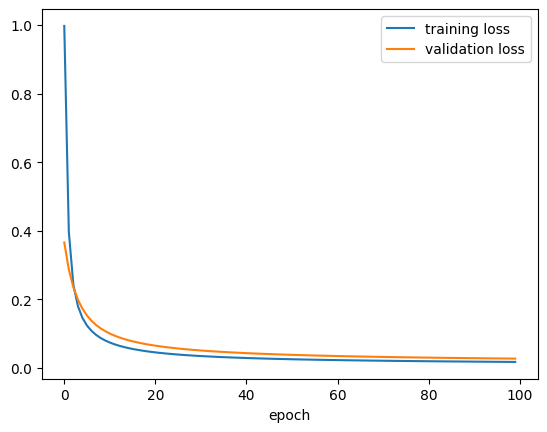

In [39]:
plt.plot(history2_df["loss"], label = "training loss")
plt.plot(history2_df["val_loss"], label = "validation loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

Proses *training* tenryata berjalan dengan sangat baik! Kali ini, baik *training loss* maupun *validation loss* turun secara drastis dan terus menuju nol.

Biasanya, walaupun *training loss* tidak mungkin naik, terkadang *validation loss* naik turun, yang bisa jadi pertanda *overfitting*.

### Menggunakan model

Seperti di scikit-learn, panggil `.predict()` untuk melakukan prediksi

In [40]:
predictions2 = model2.predict(inputs)

63/63 [==============================] - 1s 6ms/step


Ada sedikit *progress bar*, karena proses prediksi sebenarnya adalah *forward pass*. Kita bisa matikan *progress bar* dengan `verbose=False`

In [41]:
predictions2 = model2.predict(inputs, verbose=False)

In [42]:
print(predictions2)

[[9.8937179e-04]
 [1.2094462e-03]
 [1.4012366e-02]
 ...
 [9.8900378e-01]
 [9.9885350e-01]
 [8.5612518e-01]]


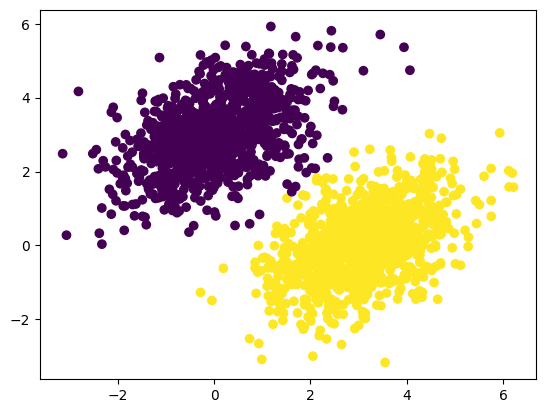

In [43]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions2[:, 0] > 0.5)
plt.show()

### Menyimpan keseluruhan model

Perintahnya adalah `.save(path_tempat_penyimpanan)` dengan *file format* `.keras`

In [44]:
model2.save("./keras_sequential_model2.keras")

Kita bisa *load* kembali model tersebut:

In [45]:
model3 = keras.models.load_model("keras_sequential_model2.keras")

Hasil prediksinya akan sama (karena modelnya memang sama):

In [46]:
predictions3 = model3.predict(inputs)

63/63 [==============================] - 1s 7ms/step


In [47]:
np.array_equal(predictions2, predictions3)

True

### Menyimpan parameter model (saja)

Daripada menyimpan keseluruhan model, kita bisa menyimpan *weights* atau parameternya saja, dengan perintah `.save_weights(path_tempat_penyimpanan)` dan *file format* `.weights.h5`

In [48]:
model2.save_weights("keras_sequential_model2.weights.h5")

Untuk *load* kembali, kita perlu menyusun *layer* model terlebih dahulu, sama persis dengan susunan yang aslinya:

In [49]:
model4 = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape = (2,)),
        keras.layers.Dense(units = 1, activation = keras.activations.sigmoid)
    ]
)

Barulah kita gunakan perintah `.load_weights(path_tempat_penyimpanan)`

In [50]:
model4.load_weights("./keras_sequential_model2.weights.h5")

Lagi-lagi, hasil prediksinya akan sama:

In [53]:
predictions4 = model4.predict(inputs)

63/63 [==============================] - 0s 3ms/step


In [54]:
np.array_equal(predictions2, predictions4)

True

Perhatikan bahwa kita belum memanggil `model4.compile`, artinya kita belum memasang *hyperparameter*. Meskipun demikian, kita masih bisa melakukan prediksi, karena proses prediksi hanyalah *forward pass*, yang hanya membutuhkan parameter *(weights and biases)*, yang memang sudah di-*load*.

Setelah melakukan `model4.compile`, dengan *hyperparameter* yang bahkan tidak harus sama dengan yang aslinya, kita bisa melanjutkan proses *training* kalau mau.

Mengapa tidak *save* keseluruhan model saja? Selain lebih hemat memori, contoh kasusnya, kita ingin menyimpan *progress* dari *training* model, yang sebenarnya susunan *layer* nya kita ketahui dengan pasti, seperti contoh `model4` di atas.

## *(Pengayaan)* Daftar pilihan *hyperparameter* di Keras

### Pilihan fungsi aktivasi

Umum digunakan

- Linier (ideentitas): `keras.activations.linear`

- Sigmoid: `keras.activations.sigmoid`

- ReLU: `keras.activations.relu`

- *(Soft)* tanh: `keras.activations.tanh`

- Softmax: `keras.activations.softmax`

Lainnya

- Relu6: `keras.activations.relu6`

    $$\Phi(x) = \min \{ \text{ReLU}(x), 6 \}$$

- Leaky ReLU: `keras.activations.leaky_relu`

    bisa dipasang *hyperparameter* $\alpha \ge 0$: `negative_slope`

    $$\Phi(x) = \max \{x, \alpha x\}$$

- ELU *(Exponential Linear Unit):* `keras.activations.elu`

    bisa dipasang *hyperparameter* $\alpha \ge 0$: `alpha`

    $$
    \Phi(x) = \begin{cases}
        x & x > 0 \\
        \alpha (e^x - 1) & \text{otherwise}
    \end{cases}
    $$

- Softplus: `keras.activations.softplus`

    $$\Phi(x) = \ln (e^x + 1)$$

- Softsign: `keras.activations.softsign`

    $$\Phi(x) = \frac{x}{|x| + 1}$$

- Mish: `keras.activations.mish`

    $$\Phi(x) = x \tanh (\text{softplus} (x))$$

- Exponential: `keras.activations.exponential`

- SELU *(Scaled Exponential Linear Unit):* `keras.activations.selu`

- GELU *(Gaussian error linear unit):* `keras.activations.gelu`

- Swish / Silu: `keras.activatins.silu`

- Hard Silu: `keras.activations.hard_silu`

- Hard sigmoid: `keras.activations.hard_sigmoid`

- Log softmax: `keras.activations.log_softmax`

Sumber: <https://keras.io/api/layers/activations/>

### Pilihan *optimizer*

Umum digunakan

- SGD: `keras.optimizers.SGD`

- Adam: `keras.optimizers.Adam` (saat ini dianggap *optimizer* terbaik)

- RMSprop: `keras.optimizers.RMSprop`

- Adagrad: `keras.optimizers.Adagrad`

Lainnya

- AdamW: `keras.optimizers.AdamW`

- Adadelta: `keras.optimizers.Adadelta`

- Adamax: `keras.optimizers.Adamax`

- Adafactor: `keras.optimizers.Adafactor`

- Nadam: `keras.optimizers.Nadam`

- Ftrl: `keras.optimizers.Ftrl`

- Lion: `keras.optimizers.Lion`

- Loss Scale Optimizer: `keras.optimizers.LossScaleOptimizer`

Kecuali *Loss Scale Optimizer*, semua *optimizer* bisa dipasang *learning rate*. Contohnya seperti berikut:
```python
keras.optimizers.SGD(learning_rate=0.01)
```

Sumber: <https://keras.io/api/optimizers/>

### Pilihan *loss function*

Umum digunakan

- Binary cross-entropy (untuk klasifikasi biner)

    *class*: `keras.losses.BinaryCrossentropy`

    fungsi: `keras.losses.binary_crossentropy`

- Categorial cross-entropy (untuk klasifikasi *multiclass*)

    *class*: `keras.losses.CategoricalCrossentropy`

    fungsi: `keras.losses.categorical_crossentropy`

- MSE / mean squared error (untuk regresi)

    *class*: `keras.losses.MeanSquaredError`

    fungsi: `keras.losses.mean_squared_error`

Lainnya, untuk klasifikasi

- Sparse categorical cross-entropy

    *class*: `keras.losses.SparseCategoricalCrossentropy`

    fungsi: `keras.losses.spare_categorical_crossentropy`

- Poisson loss

    *class*: `keras.losses.Poisson`

    fungsi: `keras.losses.poisson`

- Kullback-Leibler divergence loss

    *class*: `keras.losses.KLDivergence`

    fungsi: `keras.losses.kl_divergence`

Lainnya, untuk regresi

- MAE / mean absolute error

    *class*: `keras.losses.MeanAbsoluteError`

    fungsi: `keras.losses.mean_absolute_error`

- Mean absolute percentage error

    *class*: `keras.losses.MeanAbsolutePercentageError`

    fungsi: `keras.losses.mean_absolute_percentage_error`

- Mean squared logarithmic error

    *class*: `keras.losses.MeanSquaredLogarithmicError`

    fungsi: `keras.losses.mean_squared_logarithmic_error`

- Cosine similarity

    *class*: `keras.losses.CosineSimilarity`

    fungsi: `keras.losses.cosine_similarity`

- Huber loss

    *class*: `keras.losses.Huber`

    fungsi: `keras.losses.huber`

- Log Cosh loss

    *class*: `keras.losses.LogCosh`

    fungsi: `keras.losses.log_cosh`

Sumber: <https://keras.io/api/losses/>

### Beberapa pilihan metrik evaluasi

Umum digunakan

- Accuracy: `keras.metrics.Accuracy`

- $R^2$: `keras.metrics.R2Score`

- Binary accuracy: `keras.metrics.BinaryAccuracy`

- Categorical accuracy: `keras.metrics.CategoricalAccuracy`

Lainnya, untuk klasifikasi *multiclass*

- Sparse categorical accuracy: `keras.metrics.SpareCategoricalAccuracy`

- Top K categorical accuracy: `keras.metrics.TopKCategoricalAccuracy`

- Spare top K categorical accuracy: `keras.metrics.SpareTopKCategoricalAccuracy`

Lainnya, untuk klasifikasi biner atau True/False

- AUC: `keras.metrics.AUC`

- Precision: `keras.metrics.Precision`

- Recall: `keras.metrics.Recall`

- True Positives: `keras.metrics.TruePositives`

- True Negatives: `keras.metrics.TrueNegatives`

- False Positives: `keras.metrics.FalsePositives`

- False Negatives: `keras.metrics.FalseNegatives`

- Precision at recall: `keras.metrics.PrecisionAtRecall`

- Recall at precision: `keras.metrics.RecallAtPrecision`

- Sensitivity at specificity: `keras.metrics.SensitivityAtSpecificity`

- Specificity at sensitivity: `keras.metrics.SpecificityAtSensitivity`

- F-1 score: `keras.metrics.F1Score`

- F-Beta score: `keras.metrics.FBetaScore`

Semua pilihan *loss function* juga bisa digunakan sebagai metrik evaluasi.

Sumber: <https://keras.io/api/metrics/>

## Referensi

Sumber gambar

- Aggarwal, C. Charu. 2018. *Neural Networks and Deep Learning: A Textbook.* Edisi Pertama. Springer.

- Goodfellow, Ian; Bengio, Yoshua; & Courville, Aaron. 2016. *Deep Learning*. MIT Press.

Buku lainnya

- Géron, Aurélien. 2019. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.* Edisi Kedua. O'Reilly Media.

Internet

- <https://www.tensorflow.org/api_docs/python/tf>

- <https://keras.io/api/>